In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import mnist_pria_awgn

In [2]:
#前處理 function
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

In [3]:
#印出兩組鍍銅的圖片function
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


In [4]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Normalize and reshape the data
x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [6]:
# Create a copy of the data with added noise
noise = 0.3
(noisy_x_train, noisy_y_train), (noisy_x_test, noisy_y_test) = mnist_pria_awgn.build_mnist_awgn(noise)
noisy_x_train = preprocess(noisy_x_train)
noisy_x_test = preprocess(noisy_x_test)

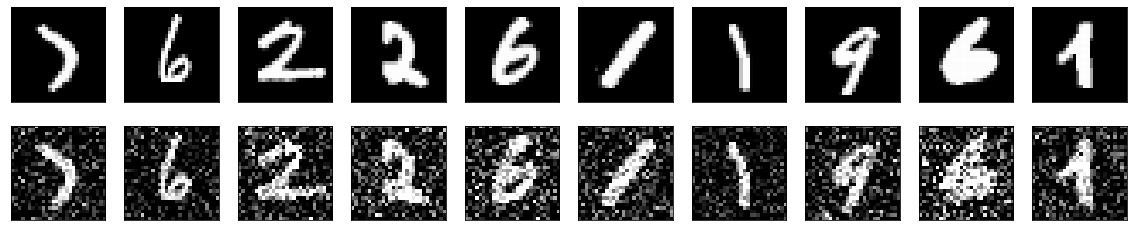

In [7]:
# Display the train data and a version of it with added noise

display(x_train, noisy_x_train)

In [8]:
## Create a copy of the data with added more noise
noise2 = 0.8
(noisy_x_train2, noisy_y_train2), (noisy_x_test2, noisy_y_test2) = mnist_pria_awgn.build_mnist_awgn(noise2)
noisy_x_train2 = preprocess(noisy_x_train2)
noisy_x_test2 = preprocess(noisy_x_test2)

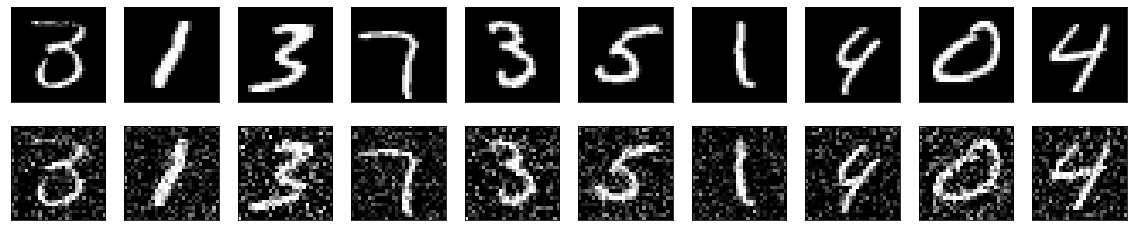

In [9]:
# Display the train data and a version of it with added noise

display(x_train, noisy_x_train2)

In [10]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)


In [11]:
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168  

In [12]:
#用加入教少雜訊的圖訓練
history = autoencoder.fit(
    x=noisy_x_train,
    y=x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_x_test, x_test),
)

Epoch 1/20
469/469 [==============================] - 13s 23ms/step - loss: 0.3034 - val_loss: 0.1104
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1084 - val_loss: 0.1005
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1000 - val_loss: 0.0962
Epoch 4/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0963 - val_loss: 0.0942loss: 0
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0945 - val_loss: 0.0928 - loss - ET - ETA: 0s - loss:
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0933 - val_loss: 0.0919
Epoch 7/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0920 - val_loss: 0.0911ETA: 2s - loss: 0 - ETA: 2s - loss:  - ETA: 2s - loss:  - ETA: 1s - loss: 0 - ETA: 1s -  - ETA: 0s - loss - ETA: 0s - loss: 
Epoch 8/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0914 - val_loss: 0.0904
Epoch 9/20
469/469 [===

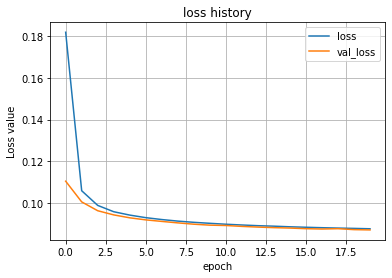

In [13]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss history')
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.show()

In [14]:
#用加入教少雜訊的圖訓練
history2 = autoencoder.fit(
    x=noisy_x_train2,
    y=x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_x_test2, x_test),
)

Epoch 1/20
469/469 [==============================] - 15s 31ms/step - loss: 0.0859 - val_loss: 0.0852
Epoch 2/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0857 - val_loss: 0.0854:
Epoch 3/20
469/469 [==============================] - 13s 29ms/step - loss: 0.0856 - val_loss: 0.0851s - loss: 
Epoch 4/20
469/469 [==============================] - 15s 31ms/step - loss: 0.0855 - val_loss: 0.08518 - ETA: 0s - loss: 
Epoch 5/20
469/469 [==============================] - 15s 31ms/step - loss: 0.0854 - val_loss: 0.0850-
Epoch 6/20
469/469 [==============================] - 14s 31ms/step - loss: 0.0853 - val_loss: 0.0848
Epoch 7/20
469/469 [==============================] - 12s 24ms/step - loss: 0.0853 - val_loss: 0.0847
Epoch 8/20
469/469 [==============================] - 16s 34ms/step - loss: 0.0852 - val_loss: 0.0847
Epoch 9/20
469/469 [==============================] - 15s 32ms/step - loss: 0.0851 - val_loss: 0.0846
Epoch 10/20
469/469 [=============================

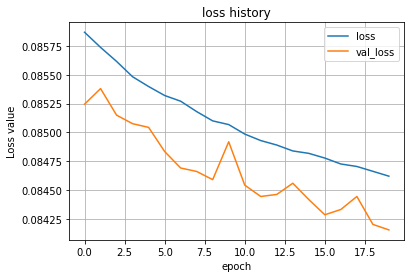

In [15]:
# Visualize history
# Plot history: Loss
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss history')
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.show()

In [18]:
def display_5row(array1, array2, array3, array4, array5):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(5, n, i + 1)
        plt.imshow(array1[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(5, n, i + 1 + n)
        plt.imshow(array2[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(5, n, i + 1 + n + n)
        plt.imshow(array3[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(5, n, i + 1 + n + n + n)
        plt.imshow(array4[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(5, n, i + 1 + n + n + n + n)
        plt.imshow(array5[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

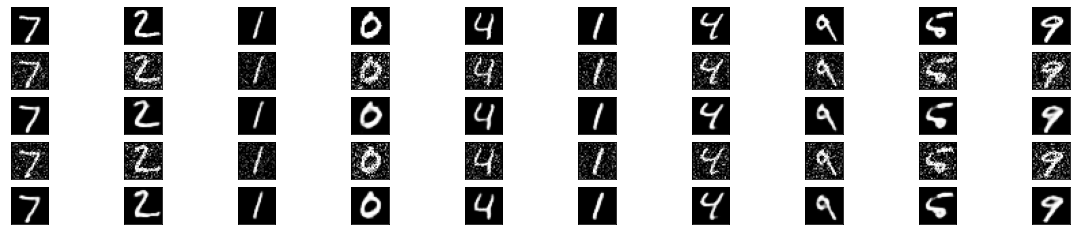

In [19]:
#display the test data with noise and the predict after denoising
predictions = autoencoder.predict(noisy_x_test)
predictions2 = autoencoder.predict(noisy_x_test2)
display_5row(x_test, noisy_x_test, predictions, noisy_x_test2, predictions2)

In [20]:
#原圖跟較少雜訊圖psnr
tf.image.psnr(x_test, noisy_x_test, max_val=255)

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([62.935062, 60.292713, 65.629166, ..., 60.066864, 60.579388,
       59.030468], dtype=float32)>

In [21]:
#原圖跟跟去除較少雜訊的圖psnr
tf.image.psnr(x_test, predictions, max_val=255)

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([72.226204, 68.99044 , 75.9481  , ..., 68.36029 , 68.96357 ,
       68.95542 ], dtype=float32)>

In [22]:
#原圖跟較多雜訊圖psnr
tf.image.psnr(x_test, noisy_x_test2, max_val=255)

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([62.62238 , 61.08134 , 65.75642 , ..., 61.48688 , 61.815777,
       58.8809  ], dtype=float32)>

In [23]:
#原圖跟跟去除較多雜訊的圖psnr
tf.image.psnr(x_test, predictions2, max_val=255)

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([73.45222 , 69.72477 , 75.58144 , ..., 69.62637 , 70.21019 ,
       66.902115], dtype=float32)>